### **Diabetes-Project**


#### **1. Import Libraries**

---


In [176]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
from sklearn.model_selection import RandomizedSearchCV
from model_evaluator import ModelEvaluator

In [177]:
plt.style.use("seaborn-v0_8-darkgrid")
warnings.filterwarnings("ignore")

#### **2. Data Loading and Overview**
---

In [178]:
data = pd.read_csv("../data/Diabetes_Data.csv")

In [179]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [180]:
data.shape

(768, 9)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### **3. Exploratory Data Analysis (EDA)**

---


> Summary statistics for numerical features


In [182]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [183]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [184]:
data.duplicated().sum()

np.int64(0)

In [185]:
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [186]:
correlation_matrix = data.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


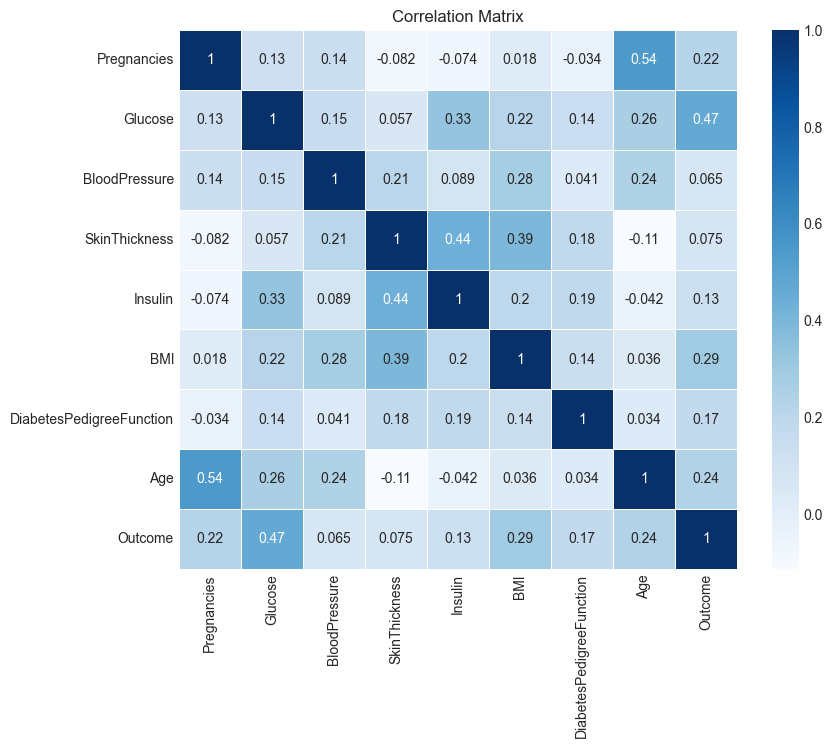

In [187]:
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [188]:
# Outcome distribution
outcome_counts = data["Outcome"].value_counts()
outcome_counts

Outcome
0    500
1    268
Name: count, dtype: int64

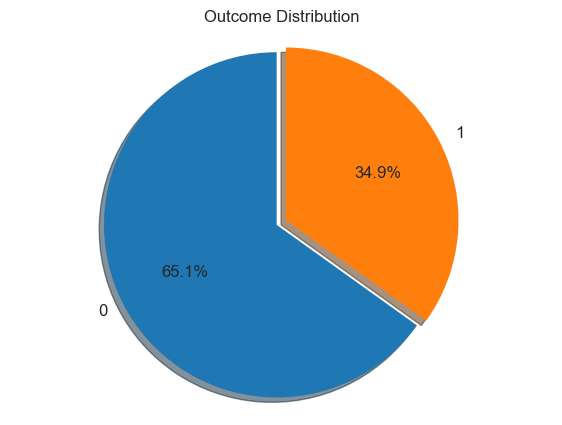

In [189]:
plt.figure(figsize=(7, 5))
plt.pie(
    x=outcome_counts.values,
    labels=outcome_counts.index,
    autopct="%1.1f%%",
    explode=np.ones(len(outcome_counts)) * 0.03,
    shadow=True,
    startangle=90,
    textprops={"fontsize": 12},
)
plt.title("Outcome Distribution")
plt.axis("equal")
plt.show()

In [190]:
# px.pie(data, names=outcome_counts.index, values=outcome_counts.values, title="Outcome Distribution")

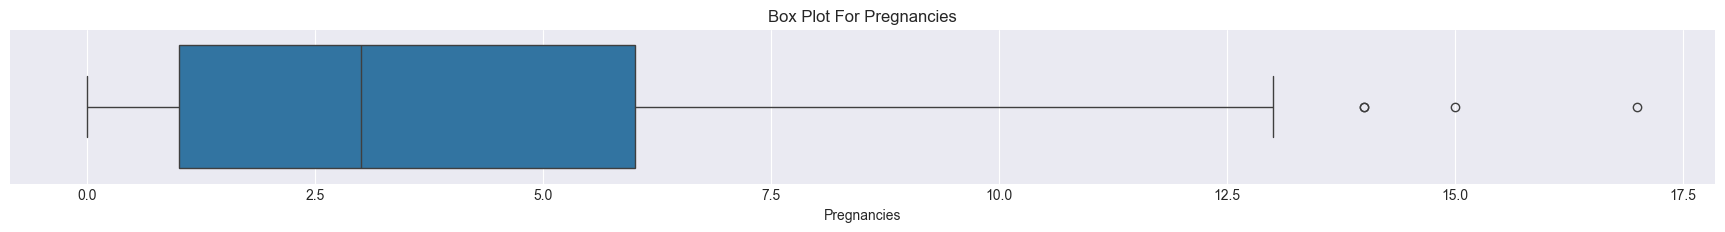

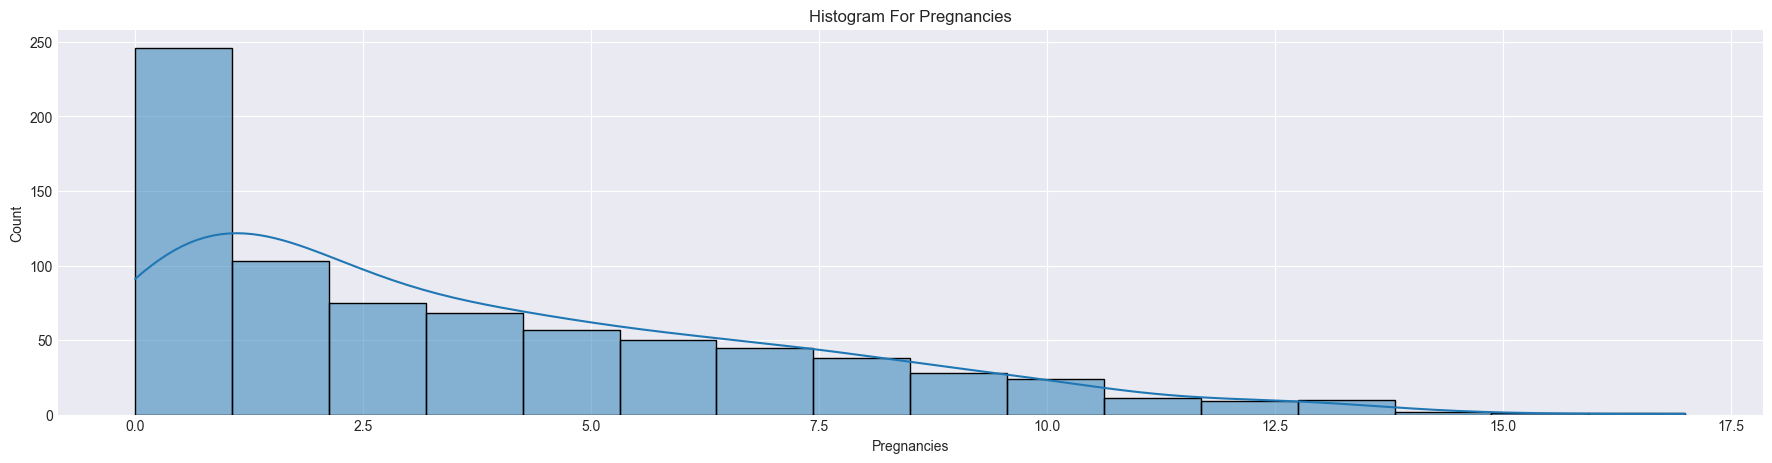

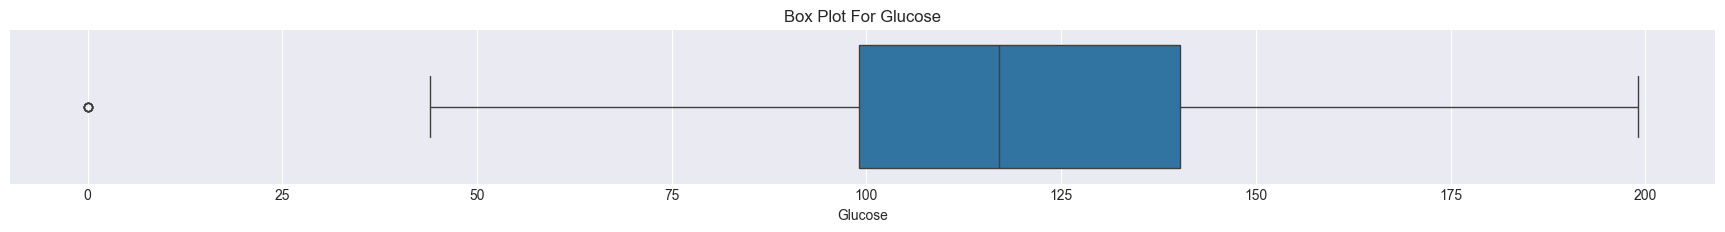

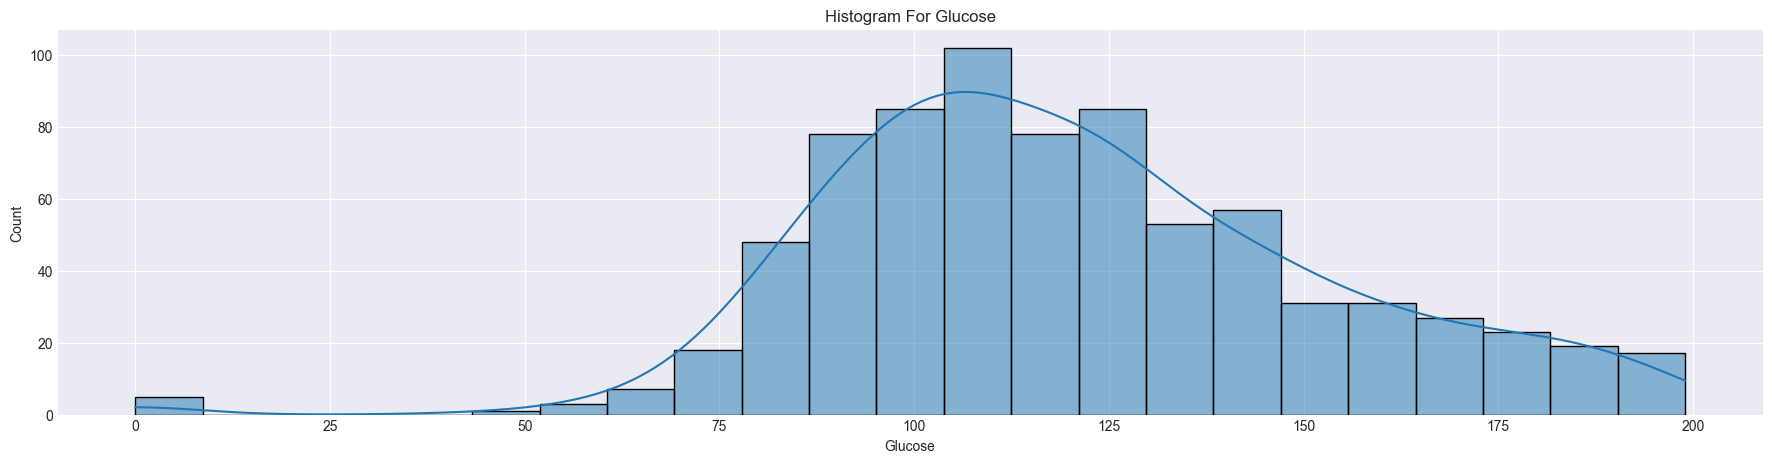

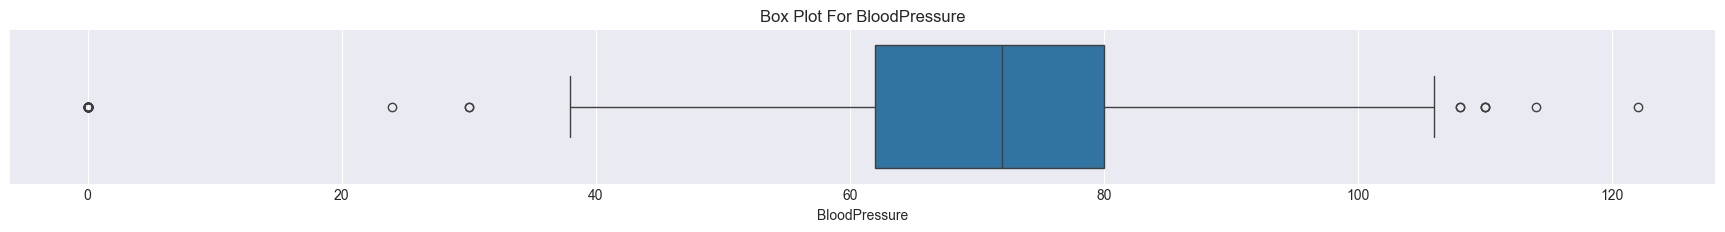

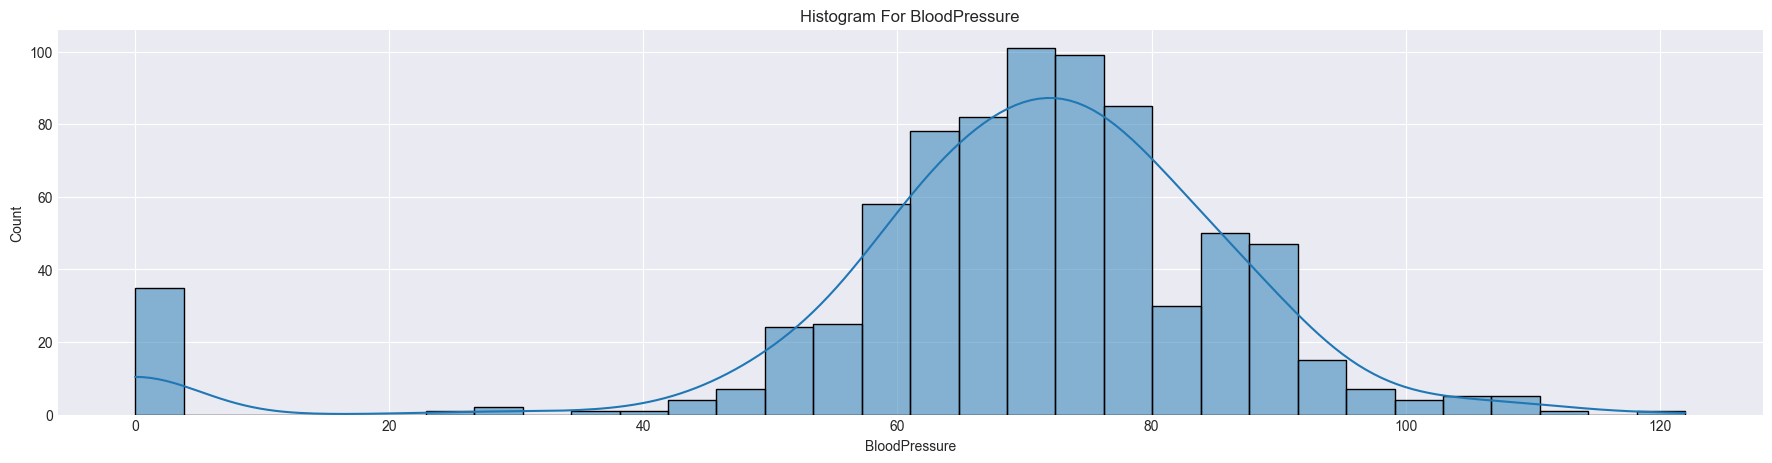

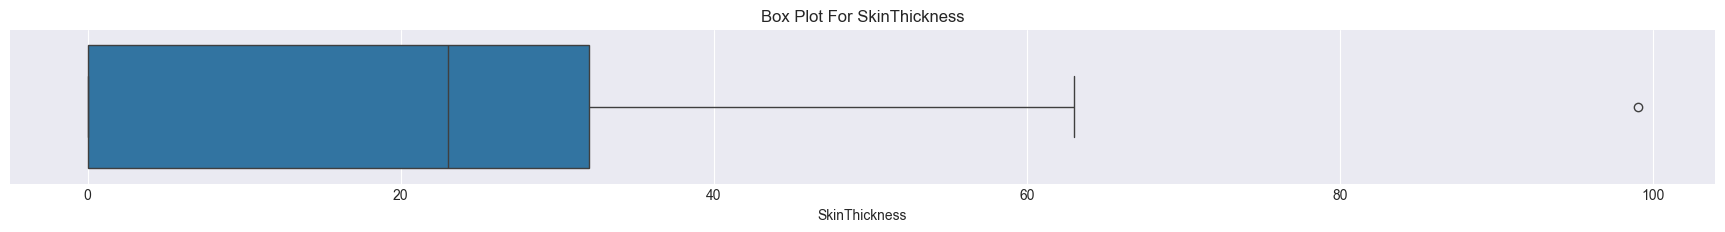

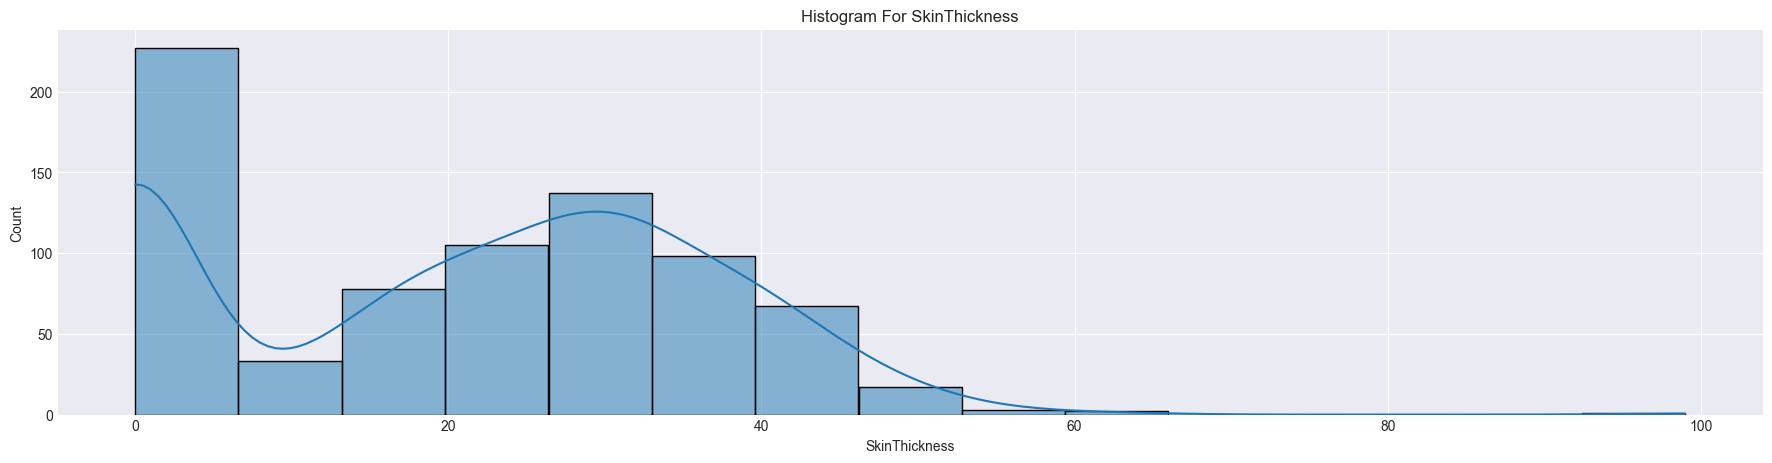

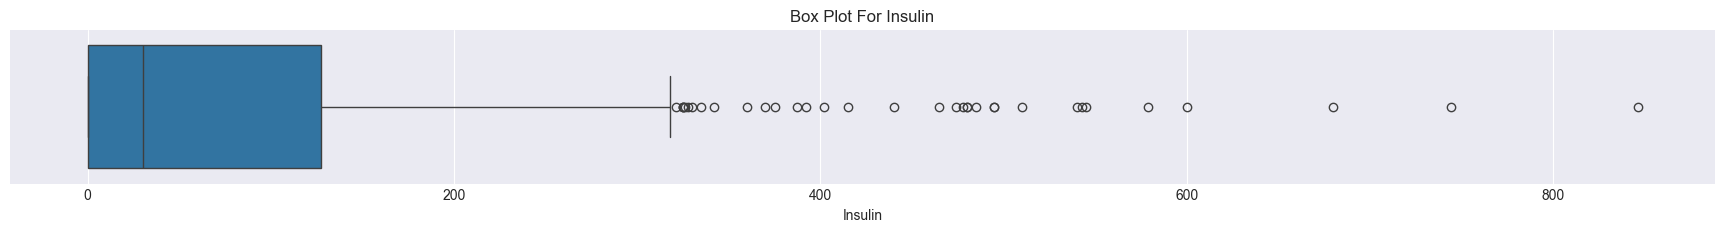

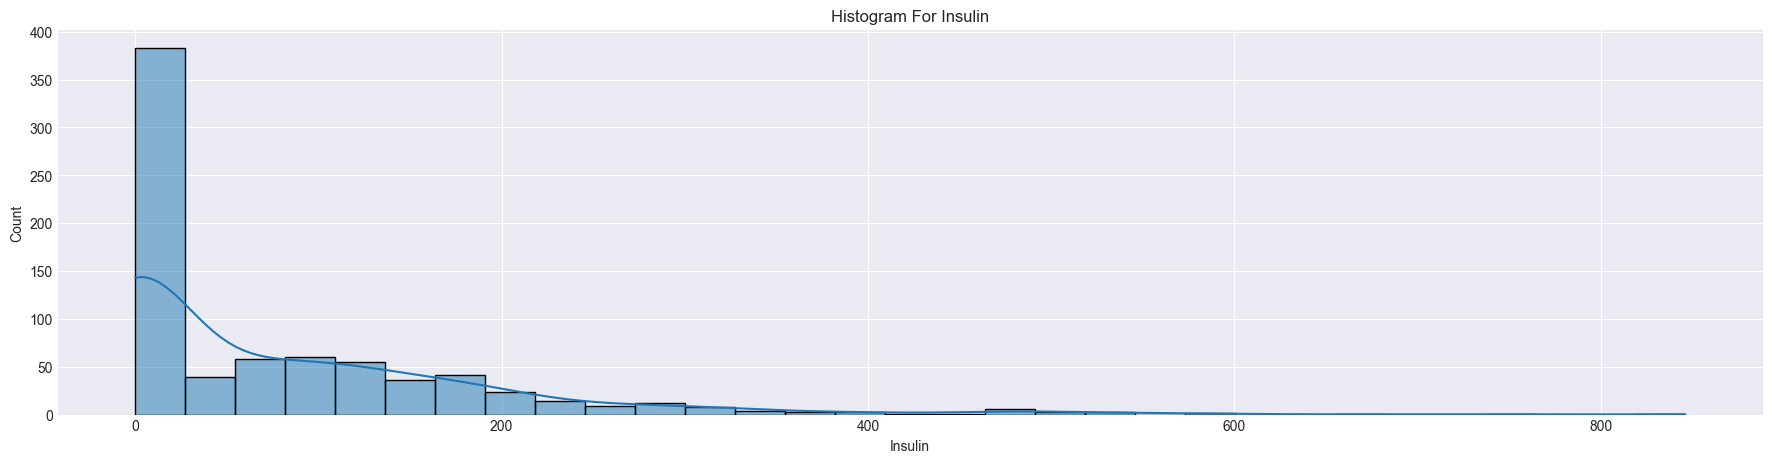

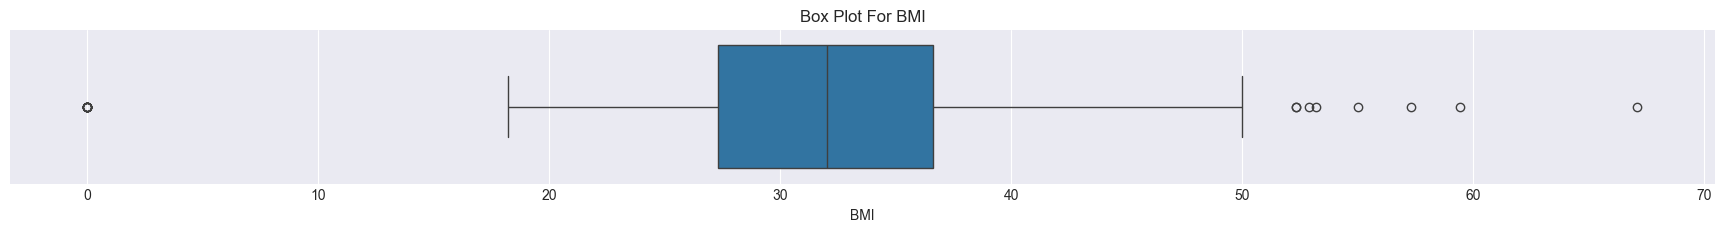

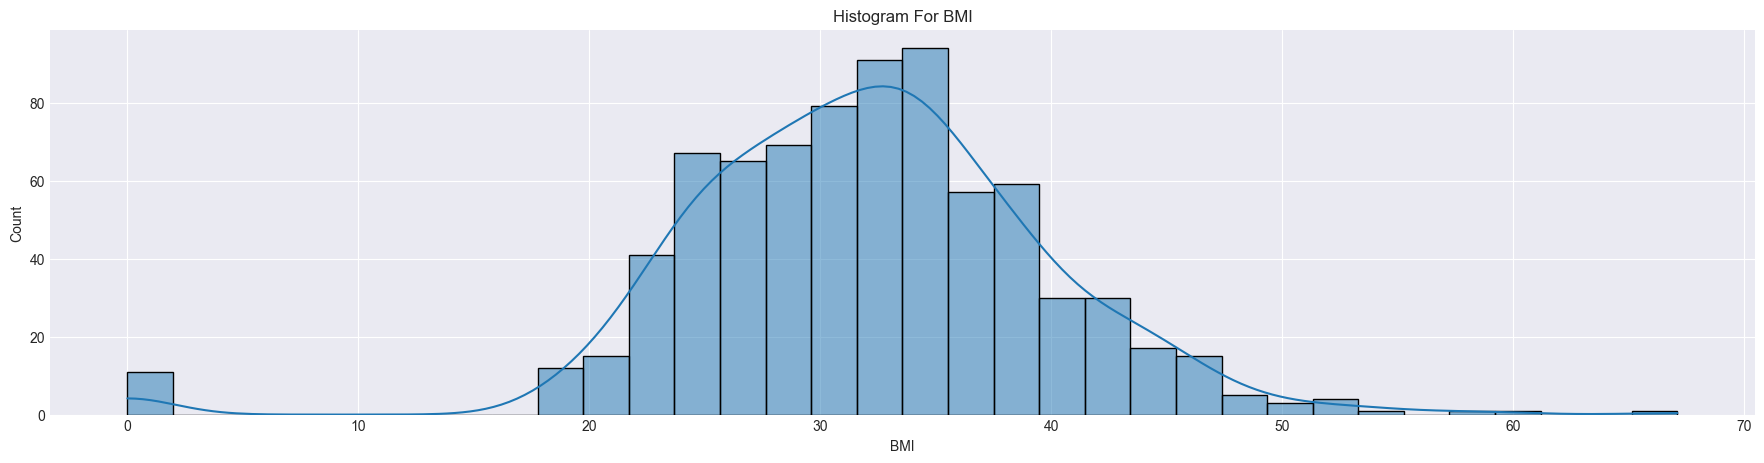

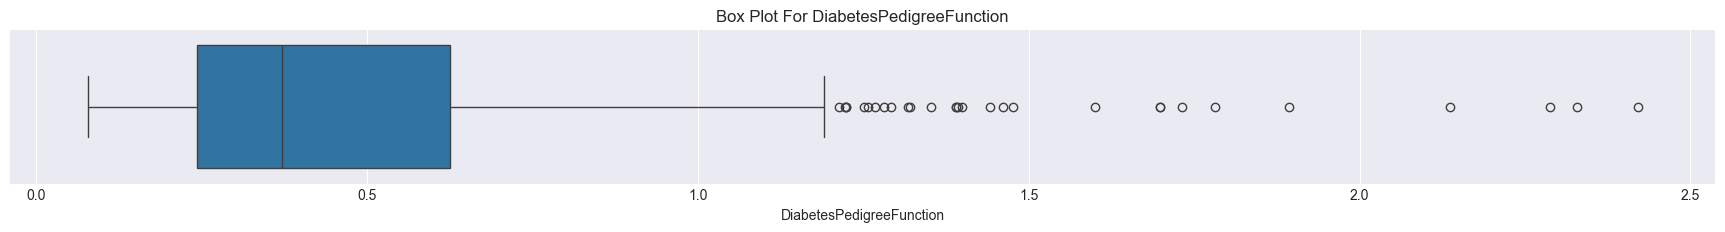

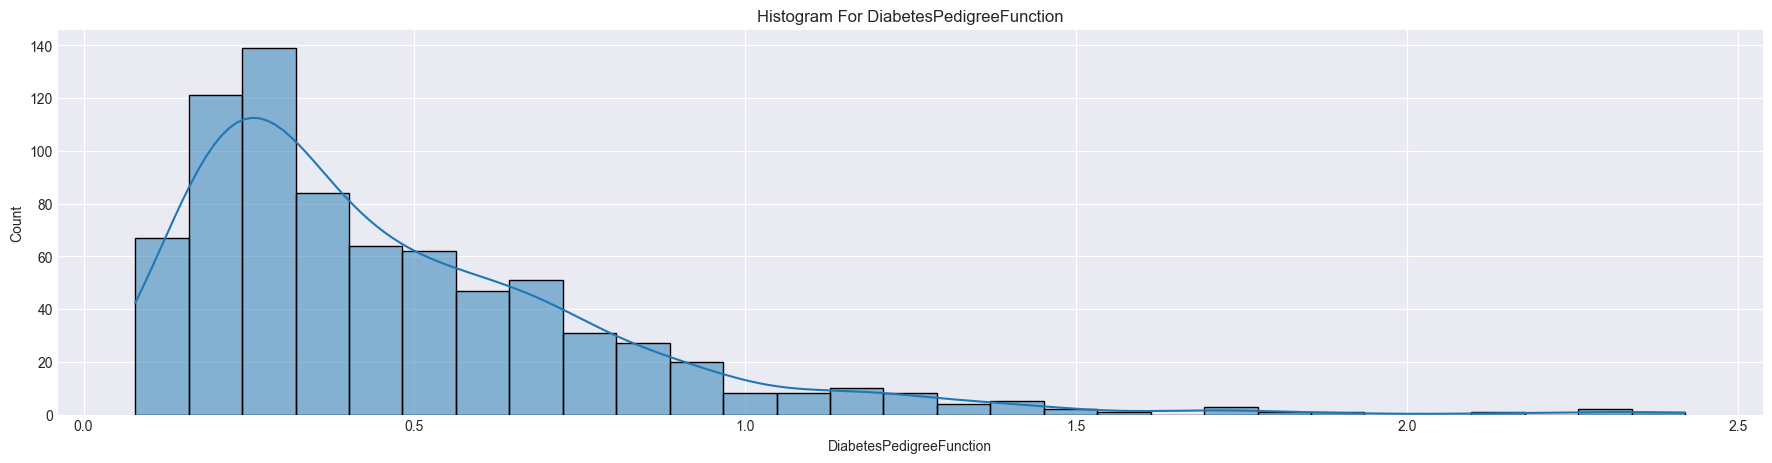

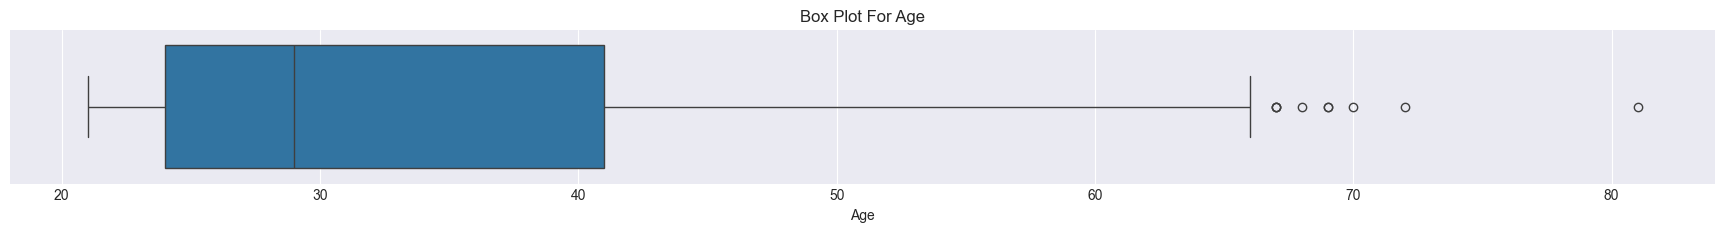

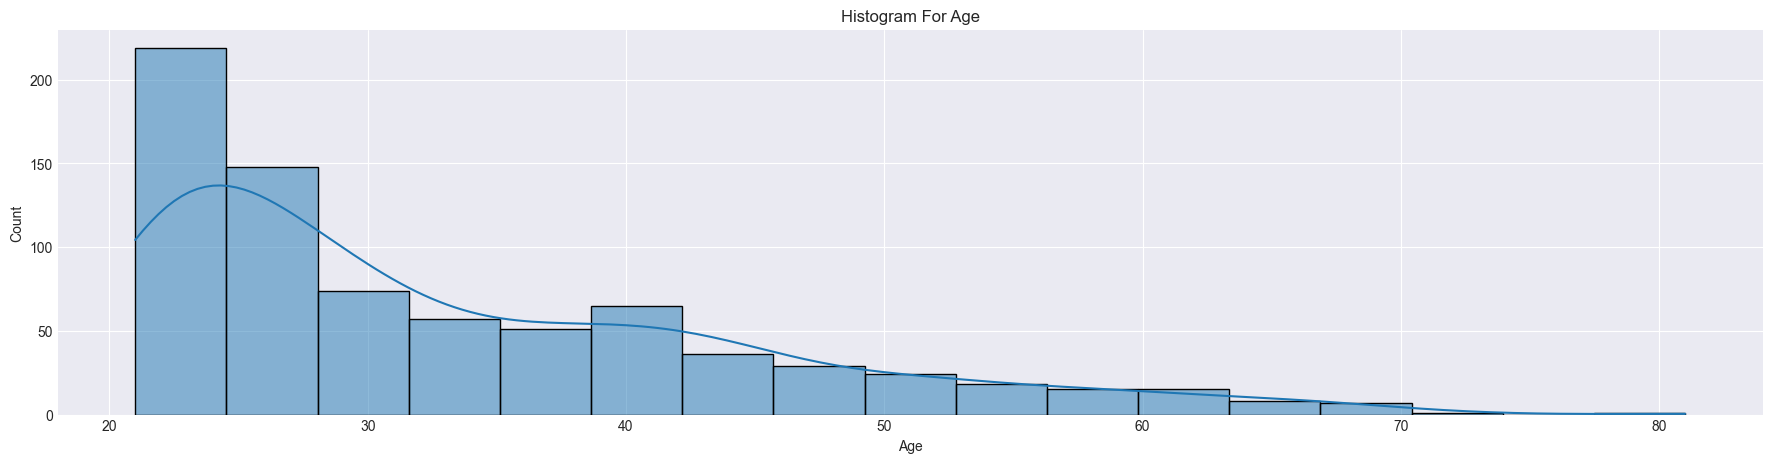

In [191]:
num_cols = data.select_dtypes("number").columns.to_list()

for col in num_cols[:-1]:
    # Box Plot
    plt.figure(figsize=(22, 2))
    sns.boxplot(data=data, x=col)
    plt.title(f"Box Plot For {col}")
    plt.show()

    # Histogram with KDE
    plt.figure(figsize=(22, 5))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f"Histogram For {col}")
    plt.show()

In [192]:
# num_cols = data.select_dtypes("number").columns.to_list()

# for col in num_cols[:-1]:
#     box_fig = px.box(data, x=col, height=300)
#     hist_fig = px.histogram(data, x=col, color="Outcome", height=400)
#     box_fig.show()
#     hist_fig.show()

#### **4. Data Preprocessing**
---

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [194]:
# Define features (X) and target (y)
X = data.drop("Outcome", axis=1)
y = data[["Outcome"]]

**Resample to handle class imbalance**


In [195]:
y.value_counts()

Outcome
0          500
1          268
Name: count, dtype: int64

In [196]:
over_sampler = RandomOverSampler(random_state=42)
X, y = over_sampler.fit_resample(X, y)

In [197]:
y.value_counts()

Outcome
0          500
1          500
Name: count, dtype: int64

**Split data into training and testing sets**


In [198]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.33, random_state=42, stratify=y
)

In [199]:
X.shape, X_train.shape, X_test.shape

((1000, 8), (670, 8), (330, 8))

**Standardize the data**


In [200]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **5. Train Models**
---

##### **5.1 Logistic Regression**


In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
log_reg_model = LogisticRegression()
param_grid_log_reg = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": np.logspace(1, 100, 5),
    "solver": ["liblinear", "saga", "lbfgs"],
}


log_reg_search_cv = RandomizedSearchCV(
    estimator=log_reg_model,
    param_distributions=param_grid_log_reg,
    n_iter=50,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True,
)

log_reg_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+001, 5.62341325e+025, 3.16227766e+050, 1.77827941e+075,
       1.00000000e+100]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=1)

In [203]:
log_reg_search_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(10.0)}

In [204]:
best_log_reg_model = log_reg_search_cv.best_estimator_
best_log_reg_model.fit(X_train, y_train)

LogisticRegression(C=np.float64(10.0), penalty='l1', solver='liblinear')

  Dataset  Accuracy  F1-Score (Macro)
0   Train  0.741791          0.741537
1    Test  0.754545          0.754272

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       165
           1       0.77      0.72      0.75       165

    accuracy                           0.75       330
   macro avg       0.76      0.75      0.75       330
weighted avg       0.76      0.75      0.75       330



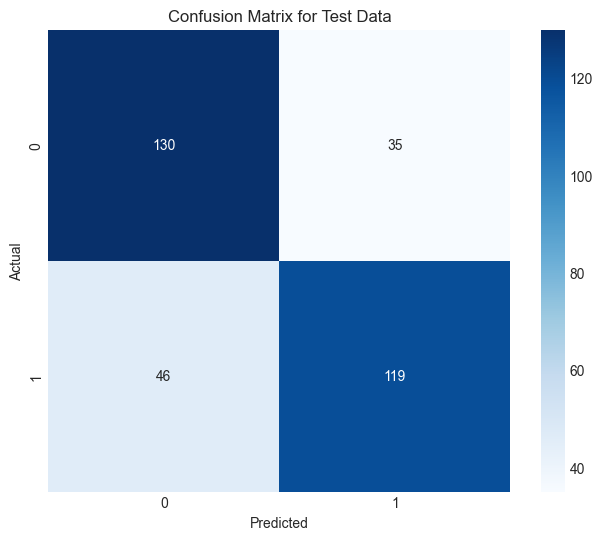

In [205]:
# Evaluate the LogisticRegression model
evaluate_log_reg = ModelEvaluator(best_log_reg_model)
evaluate_log_reg.evaluate(X_train, X_test, y_train, y_test)

##### **5.2 Support Vector Classifier (SVC)**


In [206]:
from sklearn.svm import SVC

In [207]:
svc_model = SVC(random_state=42, class_weight="balanced")

param_grid_svc = {
    "C": [1, 5, 10, 20, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 0.5, 1, 10],
    "kernel": ["linear", "rbf"],
}

svc_search_cv = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=param_grid_svc,
    n_iter=50,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True,
)

svc_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=SVC(class_weight='balanced', random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': [1, 5, 10, 20, 100],
                                        'gamma': ['scale', 'auto', 0.01, 0.1,
                                                  0.5, 1, 10],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=1)

In [208]:
svc_search_cv.best_params_

{'kernel': 'rbf', 'gamma': 0.5, 'C': 1}

In [209]:
svc_search_cv.best_score_

np.float64(0.7947805860768864)

In [210]:
best_svc_model = svc_search_cv.best_estimator_
best_svc_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=0.5, random_state=42)

  Dataset  Accuracy  F1-Score (Macro)
0   Train  0.925373          0.925370
1    Test  0.784848          0.784514

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       165
           1       0.76      0.82      0.79       165

    accuracy                           0.78       330
   macro avg       0.79      0.78      0.78       330
weighted avg       0.79      0.78      0.78       330



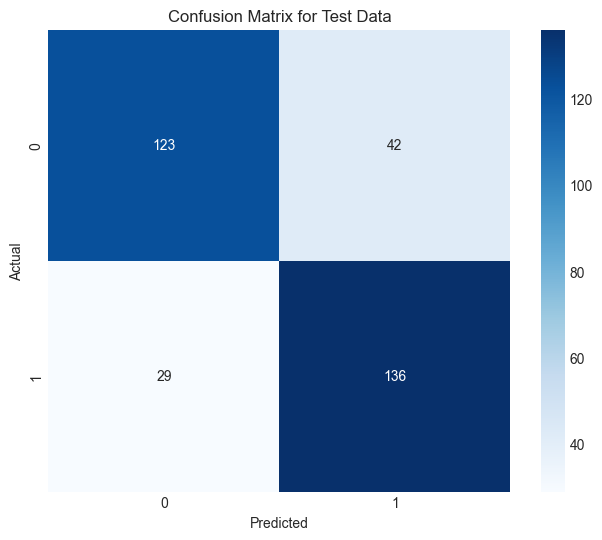

In [211]:
# Evaluate the SVC model
evaluate_svc = ModelEvaluator(best_svc_model)
evaluate_svc.evaluate(X_train, X_test, y_train, y_test)

##### **5.3 RandomForestClassifier**


In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
random_forest_model = RandomForestClassifier(random_state=42)

param_dist_forest = {
    "n_estimators": np.arange(100, 500, 30),
    "max_depth": np.arange(5, 50, 3),
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(2, 6),
}

forest_search_cv = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_dist_forest,
    n_iter=50,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    random_state=42,
    verbose=2,
)

forest_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]),
                                        'min_samples_leaf': array([2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([100, 130, 160, 190, 220, 250, 280, 310, 340, 370, 400, 430, 460,
       490])},
                   random_state=42, scoring='f1', verbose=2)

In [214]:
forest_search_cv.best_params_

{'n_estimators': np.int64(250),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(2),
 'max_depth': np.int64(29)}

In [215]:
forest_search_cv.best_score_

np.float64(0.8305099628503884)

In [216]:
best_random_forest_model = forest_search_cv.best_estimator_
best_random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(29), min_samples_leaf=np.int64(2),
                       min_samples_split=np.int64(4),
                       n_estimators=np.int64(250), random_state=42)

  Dataset  Accuracy  F1-Score (Macro)
0   Train  0.982090          0.982089
1    Test  0.836364          0.836147

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       165
           1       0.81      0.87      0.84       165

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



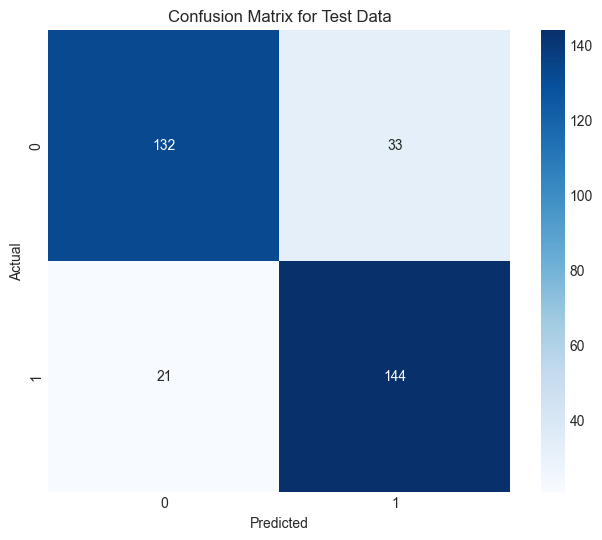

In [217]:
# Evaluate the Random Forest model
evaluate_random_forest = ModelEvaluator(best_random_forest_model)
evaluate_random_forest.evaluate(X_train, X_test, y_train, y_test)

##### **5.4 K-Nearest Neighbors (KNN)**


In [218]:
from sklearn.neighbors import KNeighborsClassifier

In [219]:
knn_model = KNeighborsClassifier()

param_grid_knn = {
    "n_neighbors": np.arange(1, 10, 2),
    "weights": ["uniform", "distance"],
    "p": [1, 2],  # p=1 for Manhattan, p=2 for Euclidean distance
}

knn_search_cv = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_grid_knn,
    n_iter=15,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True,
)

knn_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'n_neighbors': array([1, 3, 5, 7, 9]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=1)

In [220]:
knn_search_cv.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': np.int64(9)}

In [221]:
best_knn_model = knn_search_cv.best_estimator_
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(9), p=1, weights='distance')

  Dataset  Accuracy  F1-Score (Macro)
0   Train  1.000000          1.000000
1    Test  0.824242          0.823718

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       165
           1       0.79      0.88      0.83       165

    accuracy                           0.82       330
   macro avg       0.83      0.82      0.82       330
weighted avg       0.83      0.82      0.82       330



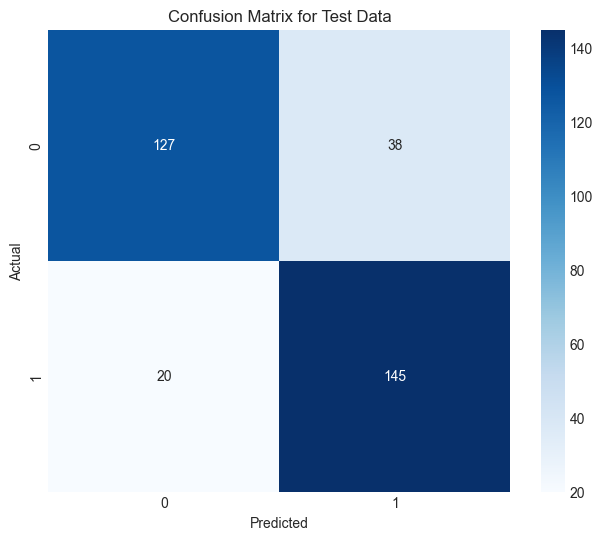

In [222]:
# Evaluate the KNN model
evaluate_knn = ModelEvaluator(best_knn_model)
evaluate_knn.evaluate(X_train, X_test, y_train, y_test)

---


#### **6. Model Comparison**
---

In [223]:
metrics = ModelEvaluator.metrics_df
metrics.drop_duplicates(subset=["Model"], inplace=True, keep="last")
metrics

,Model,Accuracy,F1-Score (Macro),Precision (Macro),Recall (Macro)
4,LogisticRegression,0.754545,0.754272,0.755682,0.754545
5,SVC,0.784848,0.784514,0.786628,0.784848
6,RandomForestClassifier,0.836364,0.836147,0.838152,0.836364
7,KNeighborsClassifier,0.824242,0.823718,0.828148,0.824242


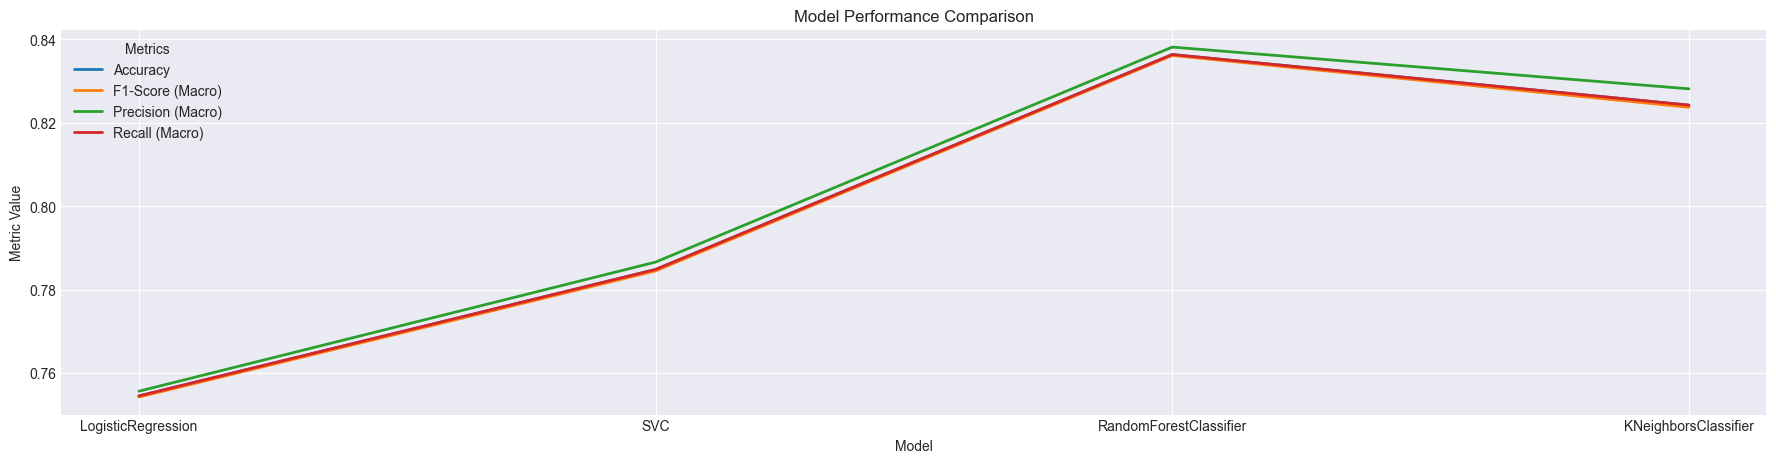

In [224]:
plt.figure(figsize=(22, 5))
for metric in metrics.columns[1:]:
    sns.lineplot(data=metrics, x="Model", y=metric, linewidth=2, label=metric)

plt.legend(title="Metrics")
plt.ylabel("Metric Value")
plt.title("Model Performance Comparison")
plt.show()

In [225]:
px.line(metrics, x="Model", y=metrics.columns[1:], markers=True).show()

#### **7. Save Model**
---

In [226]:
import pickle

In [227]:
with open("../models/Diabetes_Model.pkl", "wb") as model_file:
    pickle.dump(best_random_forest_model, model_file)

#### **8. Save Scaler**
---

In [228]:
with open("../models/Diabetes_StandardScaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)